![](https://i.pinimg.com/564x/f5/ca/8b/f5ca8b79e3f0d4b3e583e161af770d83.jpg)

# Regression

Kevin J. Walchko, Phd

23 Dec 2020

---

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). 

Here we have a dataset of companies and what they spent during the year and their profit from it. The **goal** of this is to create a model of this data and attempt to create
a correlation between spending amounts and profit. Thus, if we know how much  a company
spends, we can **predict** what its profit will be ... **money**.

## Summary of Results

Below, models are buit and a sum squared error is calculated for each model.

| Model           | RSS Error |
|-----------------|:--------:|
| Linear Regresor | \$497.7K |
| SVM             | \$61.1K  |
| Decision Tree   | \$22.9K  |
| Random Forest   | \$18.8K  |


## References

- Machine learning class on udemy.com
- wikipedia: [regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)

In [1]:
import numpy as np
from numpy.linalg import norm
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def evaluate(y_test, y_pred):
    plt.plot(y_pred, 'o-', label="Predicted");
    plt.plot(y_test, 'o-', label="Truth");
    plt.grid(True)
    plt.legend()
    plt.title(f"RSS: ${1e-3*norm(y_test.ravel() - y_pred):0.1f}K");

## Data Conditioning

So this dataset describes a bunch of startup companies and what they spent their money on, how profitable they were, and where they are located. 

In [4]:
dataset = pd.read_csv('../datasets/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# I took out the state, since there is no mean, std, etc for a string :)
dataset[["R&D Spend", "Administration", "Marketing Spend", "Profit"]].describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


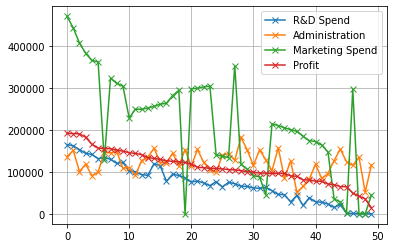

In [6]:
# this is just a plot of the entire data set showing what each company (which
# is x) spent and what their profit is
dd = dataset[["R&D Spend", "Administration", "Marketing Spend", "Profit"]]
dd.plot(marker="x", grid=True);

In [8]:
# get the X and Y values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# encode states into integers using OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,  # set aside 20% for testing
    random_state = 0) # set seed to 0, so we always get same results

# some of the regessors want the y data this way, some don't
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

print(f"Train size: {x_train.shape} {y_train.shape}")
print(f"Test size: {x_test.shape} {y_test.shape}")

Train size: (40, 6) (40, 1)
Test size: (10, 6) (10, 1)


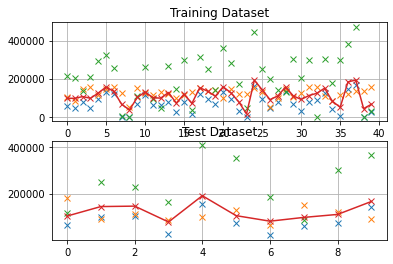

In [8]:
# Not sure this is really going to show something, but let's
# take a look at what the data looks like UNSCALED. Each column
# is a company and the "x"s are what they are spending while
# the line is their profit.
plt.subplot(2,1,1)
plt.plot(x_train[:,3:], "x")
plt.plot(y_train, "x-")
plt.title("Training Dataset")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_test[:,3:], "x")
plt.plot(y_test, "x-")
plt.title("Test Dataset")
plt.grid(True);

In [9]:
# Let's scale the input (X) data, but ONLY the non-binary values.
# REMEMBER, we OneHotEncoded the first 3 columns which represented
# states ... those are already 0 or 1.
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = x_train.copy()
X_train[:,3:] = sc_X.fit_transform(x_train[:,3:])
Y_train = sc_y.fit_transform(y_train)

print(np.mean(X_train[:,3:], axis=0))

[1.7763568394002506e-16 1.121325254871408e-15 6.661338147750939e-17]


In [10]:
# For the test dataset, we ONLY transform the data. 
# Fitting the data would skew the results, because
# our model is not supposed to know the test dataset.
X_test = x_test.copy()
X_test[:,3:] = sc_X.transform(x_test[:,3:])
Y_test = sc_y.transform(y_test)

print(np.mean(X_test[:,3:], axis=0))

[0.22280438696399035 -0.39531975186119067 0.359794757079343]


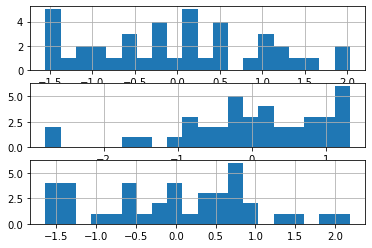

In [11]:
# Just trying to visualize the input data (X) here.
numbin = 20;
plt.subplot(3,1,1)
plt.hist(X_train[:,3], bins=numbin)
plt.grid(True);
plt.subplot(3,1,2)
plt.hist(X_train[:,4], bins=numbin)
plt.grid(True);
plt.subplot(3,1,3)
plt.hist(X_train[:,5], bins=numbin)
plt.grid(True);

# Linear Regressor

**WARNING:** the predictor here outputs data differently than the other regressors, hence no need to *unravel* it.

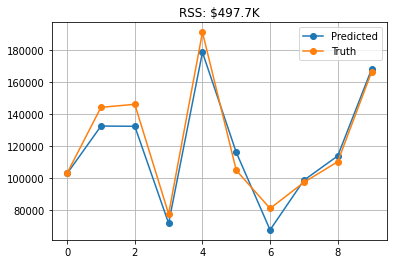

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

evaluate(y_test, sc_y.inverse_transform(Y_pred))

# Support Vector Machine

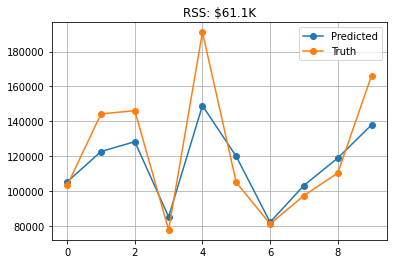

In [18]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, Y_train.ravel())

Y_pred = svm.predict(X_test)

evaluate(y_test, sc_y.inverse_transform(Y_pred))

# Decision Trees

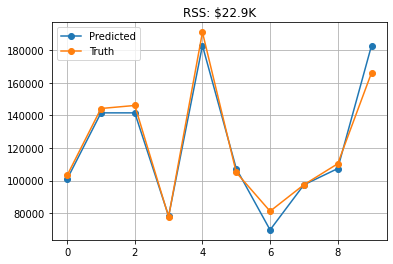

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

evaluate(y_test, sc_y.inverse_transform(Y_pred))


# Random Forest

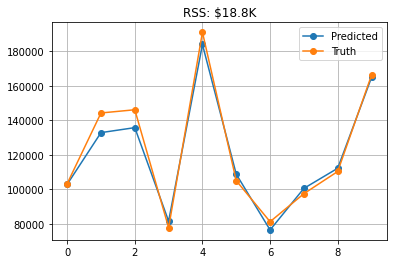

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, Y_train.ravel())

Y_pred = rf.predict(X_test)

evaluate(y_test, sc_y.inverse_transform(Y_pred))